In [36]:
import json
import numpy as np
import pandas as pd 
import seaborn as sns
from commands import COMMANDS
from matplotlib import pyplot as plt

sns.set_style('whitegrid')

In [37]:
path = '../data/ad_music_proccessed.csv'
data = pd.read_csv(path,index_col=0)
data['date'] = data.timestamp.apply(lambda x: pd.to_datetime(x).date())

In [38]:
data.subscription_status.value_counts()

subscription_status
paid     86983
trial     6662
Name: count, dtype: int64

In [39]:
free_accounts = data[data.subscription_status.eq('trial')]
free_accounts.user_id.value_counts()

user_id
U060216    86
U768236    84
U863009    78
U362494    75
U142592    73
           ..
U072959    11
U157986    11
U930916    10
U212514     9
U949658     6
Name: count, Length: 162, dtype: int64

In [40]:
free_accounts['target_artist'].value_counts()

target_artist
A000360    1585
A000006      39
A000574      30
A000114      30
A000820      29
           ... 
A000825       1
A000211       1
A000319       1
A000150       1
A000247       1
Name: count, Length: 441, dtype: int64

In [41]:
free_accounts[free_accounts['target_artist'].eq('A000360')]

,timestamp,user_id,user_email,account_creation_date,subscription_status,account_tier,path,http_method,ip,org,...,ip_c_class,device_age,cookie_age,country_age,asn_age,ua_age,browser_age,os_age,ip_age,date
54579,2024-07-01 00:38:42,U672784,pphelps@tempmail.ru,2024-06-29 06:44:44,trial,listener,/artist/A000360/song/S000136/play,POST,120.0.0.87,Philippine Long Distance Telephone Company,...,120.0.0,1,0,1,1,0,0,0,1,2024-07-01
54580,2024-07-01 00:38:44,U672784,pphelps@tempmail.ru,2024-06-29 06:44:44,trial,listener,/artist/A000360/song/S000061/rate,POST,120.0.0.87,Philippine Long Distance Telephone Company,...,120.0.0,1,0,1,1,0,0,0,1,2024-07-01
54584,2024-07-01 00:40:50,U672784,pphelps@tempmail.ru,2024-06-29 06:44:44,trial,listener,/artist/A000360/song/S000079/add_comment,POST,120.0.0.87,Philippine Long Distance Telephone Company,...,120.0.0,1,0,1,1,0,0,0,1,2024-07-01
54591,2024-07-01 00:47:52,U672784,pphelps@tempmail.ru,2024-06-29 06:44:44,trial,listener,/artist/A000360/song/S000077/pause,POST,120.0.0.87,Philippine Long Distance Telephone Company,...,120.0.0,1,0,1,1,0,0,0,1,2024-07-01
54592,2024-07-01 00:48:11,U672784,pphelps@tempmail.ru,2024-06-29 06:44:44,trial,listener,/artist/A000360/song/S000096/add_comment,POST,120.0.0.87,Philippine Long Distance Telephone Company,...,120.0.0,1,0,1,1,0,0,0,1,2024-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62952,2024-07-07 23:37:08,U895065,john73@guerrillamail.com,2024-07-02 06:13:34,trial,listener,/artist/A000360/song/S000094/add_comment,POST,120.0.0.56,Philippine Long Distance Telephone Company,...,120.0.0,123,123,123,123,123,123,123,123,2024-07-07
62953,2024-07-07 23:41:08,U895065,john73@guerrillamail.com,2024-07-02 06:13:34,trial,listener,/artist/A000360/song/S000095/rate,POST,120.0.0.56,Philippine Long Distance Telephone Company,...,120.0.0,123,123,123,123,123,123,123,123,2024-07-07
62956,2024-07-07 23:43:22,U895065,john73@guerrillamail.com,2024-07-02 06:13:34,trial,listener,/artist/A000360/song/S000080/pause,POST,120.0.0.56,Philippine Long Distance Telephone Company,...,120.0.0,123,123,123,123,123,123,123,123,2024-07-07
62963,2024-07-07 23:50:21,U895065,john73@guerrillamail.com,2024-07-02 06:13:34,trial,listener,/artist/A000360/song/S000094/rate,POST,120.0.0.56,Philippine Long Distance Telephone Company,...,120.0.0,123,123,123,123,123,123,123,123,2024-07-07


In [42]:
gp = free_accounts['subscription_status'].groupby([data.date,data.target_artist]).count().unstack(fill_value=0)
gp

target_artist,A000001,A000004,A000005,A000006,A000007,A000010,A000011,A000012,A000013,A000018,...,A000982,A000983,A000985,A000986,A000987,A000990,A000991,A000992,A000993,A001000
date,,,,,,,,,,,,,,,,,,,,,
2024-07-01,0,4,0,15,0,0,0,0,10,0,...,5,0,0,0,0,1,0,0,0,0
2024-07-02,0,2,0,10,1,0,0,0,0,0,...,1,0,0,0,0,4,2,3,0,1
2024-07-03,0,0,0,6,0,0,0,3,8,0,...,0,0,0,0,0,2,0,6,0,0
2024-07-04,2,0,0,0,0,0,3,0,0,0,...,0,1,0,0,0,3,0,0,0,0
2024-07-05,0,0,0,3,0,10,2,0,0,0,...,1,0,4,0,11,0,0,0,0,3
2024-07-06,1,0,1,0,0,0,2,3,0,2,...,0,0,4,0,2,0,0,0,0,0
2024-07-07,0,0,0,5,2,3,0,3,1,2,...,0,0,0,4,2,1,0,0,3,3


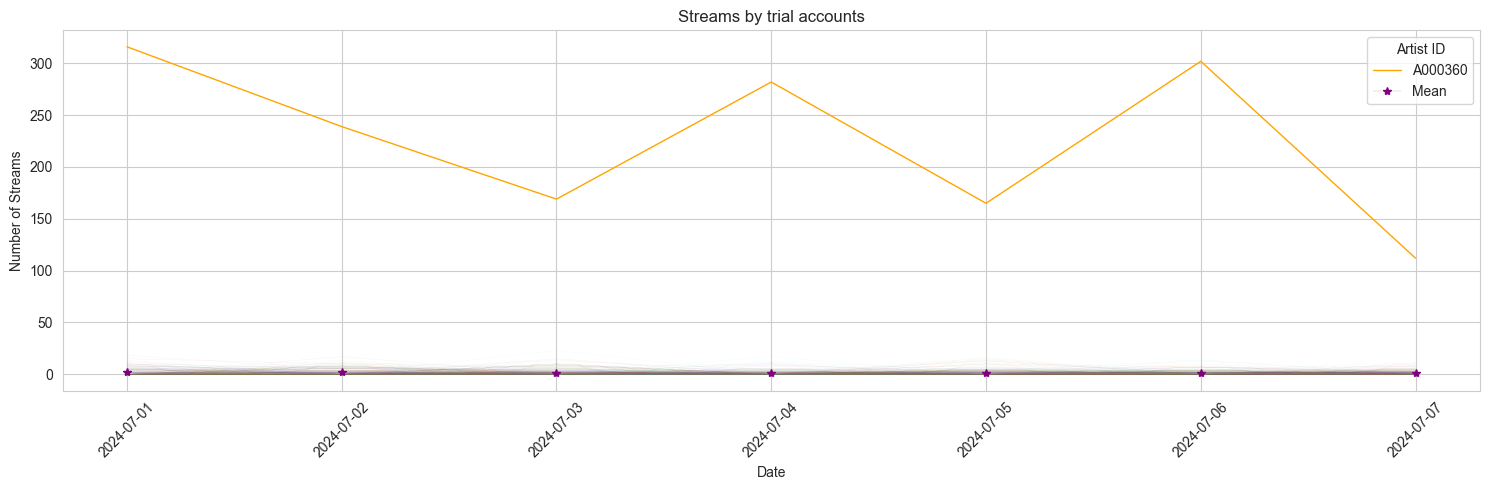

In [43]:
dates = gp.index
artists = gp.columns

fig = plt.figure(figsize = (15,5))
for artist in artists:
    streams = gp[artist]
    if sum(streams) > 50:
        plt.plot(dates,streams,lw=1,label=artist,c='orange')
    else:
        plt.plot(dates,streams,lw=0.1,alpha=0.2)

mean = gp.mean(axis=1)
plt.plot(dates,mean,lw=0.1,label='Mean',c='purple',marker='*')

    
plt.title("Streams by trial accounts")
plt.xlabel("Date")
plt.ylabel("Number of Streams")
plt.legend(title="Artist ID")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [44]:
free_accounts[free_accounts['target_artist'].eq('A000360')].user_id.nunique()

40

In [45]:
sus_acc = free_accounts[free_accounts['target_artist'].eq('A000360')].user_id.unique()
data[data.user_id.isin(sus_acc)].target_artist.value_counts()

target_artist
A000360    1585
Name: count, dtype: int64

In [46]:
free_accounts[free_accounts['target_artist'].eq('A000360')]

,timestamp,user_id,user_email,account_creation_date,subscription_status,account_tier,path,http_method,ip,org,...,ip_c_class,device_age,cookie_age,country_age,asn_age,ua_age,browser_age,os_age,ip_age,date
54579,2024-07-01 00:38:42,U672784,pphelps@tempmail.ru,2024-06-29 06:44:44,trial,listener,/artist/A000360/song/S000136/play,POST,120.0.0.87,Philippine Long Distance Telephone Company,...,120.0.0,1,0,1,1,0,0,0,1,2024-07-01
54580,2024-07-01 00:38:44,U672784,pphelps@tempmail.ru,2024-06-29 06:44:44,trial,listener,/artist/A000360/song/S000061/rate,POST,120.0.0.87,Philippine Long Distance Telephone Company,...,120.0.0,1,0,1,1,0,0,0,1,2024-07-01
54584,2024-07-01 00:40:50,U672784,pphelps@tempmail.ru,2024-06-29 06:44:44,trial,listener,/artist/A000360/song/S000079/add_comment,POST,120.0.0.87,Philippine Long Distance Telephone Company,...,120.0.0,1,0,1,1,0,0,0,1,2024-07-01
54591,2024-07-01 00:47:52,U672784,pphelps@tempmail.ru,2024-06-29 06:44:44,trial,listener,/artist/A000360/song/S000077/pause,POST,120.0.0.87,Philippine Long Distance Telephone Company,...,120.0.0,1,0,1,1,0,0,0,1,2024-07-01
54592,2024-07-01 00:48:11,U672784,pphelps@tempmail.ru,2024-06-29 06:44:44,trial,listener,/artist/A000360/song/S000096/add_comment,POST,120.0.0.87,Philippine Long Distance Telephone Company,...,120.0.0,1,0,1,1,0,0,0,1,2024-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62952,2024-07-07 23:37:08,U895065,john73@guerrillamail.com,2024-07-02 06:13:34,trial,listener,/artist/A000360/song/S000094/add_comment,POST,120.0.0.56,Philippine Long Distance Telephone Company,...,120.0.0,123,123,123,123,123,123,123,123,2024-07-07
62953,2024-07-07 23:41:08,U895065,john73@guerrillamail.com,2024-07-02 06:13:34,trial,listener,/artist/A000360/song/S000095/rate,POST,120.0.0.56,Philippine Long Distance Telephone Company,...,120.0.0,123,123,123,123,123,123,123,123,2024-07-07
62956,2024-07-07 23:43:22,U895065,john73@guerrillamail.com,2024-07-02 06:13:34,trial,listener,/artist/A000360/song/S000080/pause,POST,120.0.0.56,Philippine Long Distance Telephone Company,...,120.0.0,123,123,123,123,123,123,123,123,2024-07-07
62963,2024-07-07 23:50:21,U895065,john73@guerrillamail.com,2024-07-02 06:13:34,trial,listener,/artist/A000360/song/S000094/rate,POST,120.0.0.56,Philippine Long Distance Telephone Company,...,120.0.0,123,123,123,123,123,123,123,123,2024-07-07


In [47]:
sus_accounts = free_accounts[free_accounts['target_artist'].eq('A000360')]

In [48]:
sus_accounts.cookie.value_counts()

cookie
a11a3a34b1d68ebe53474a19fe6fdef6    529
3d4b68a542d2a96c067806ff026e4b99    426
2e9e8544e6590bdca5f26fdcc311892e    195
cf332e89d0315df2f8f79ceb42c361fb    164
be451e6375482926fa57960290912c47    160
56c426d56caf22efeaa6f65c29c8c0a9    111
Name: count, dtype: int64

In [49]:
sus_accounts.asn.value_counts()

asn
AS9299    824
AS7922    761
Name: count, dtype: int64

In [50]:
sus_accounts.ip_c_class.value_counts()

ip_c_class
120.0.0    824
73.0.0     761
Name: count, dtype: int64

In [51]:
sus_accounts.email_domain.value_counts()

email_domain
yopmail.com          255
trashmail.com        217
fakemail.net         183
mailinator.com       157
protonmail.com       124
mail.ru              114
temp-mail.org        113
yandex.ru             95
guerrillamail.com     90
gmx.com               63
dispostable.com       62
10minutemail.com      61
tempmail.ru           51
Name: count, dtype: int64